In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Delivery Time

In [2]:
dt=pd.read_csv('/content/drive/MyDrive/Asignments_DS/delivery_time.csv')
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df=dt.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1)

In [4]:
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
#Lets check for Ouliers by boxplot

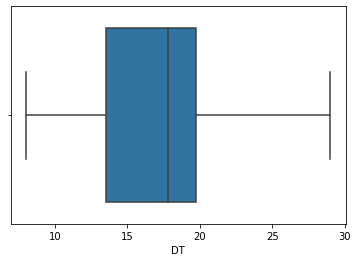

In [6]:

sns.boxplot(x='DT', data=df)

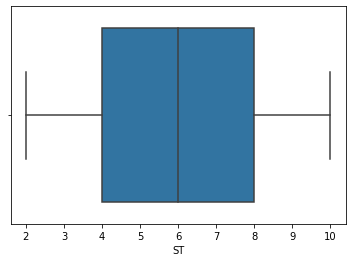

In [7]:

sns.boxplot(x='ST', data=df)

In [8]:
#There is no outlers that seems to happen


In [9]:
#Lets check correleation
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [10]:
#Lets build the model


In [11]:
model = smf.ols("DT~ST", data=df).fit()

In [14]:
print('P value is:', model.pvalues, '\n', '\n', 'Rsquared value is:',model.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model.rsquared )

P value is: Intercept    0.001147
ST           0.000004
dtype: float64 
 
 Rsquared value is: 0.6822714748417231 
 
 Adjusted Rsquared value is: 0.6822714748417231


In [ ]:
#R squared Value is less, we need to try some modification 


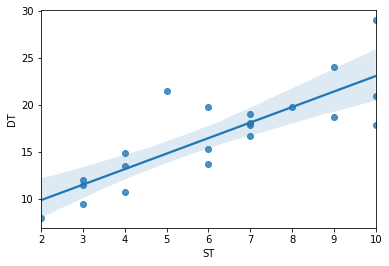

In [15]:
sns.regplot(x='ST', y='DT', data=df)

In [ ]:
#squring the DP values

In [21]:
df['ST2'] = df['ST']**2
df

,DT,ST,ST*2,2ST,ST2
0,21.00,10,100,100,100
1,13.50,4,16,16,16
2,19.75,6,36,36,36
3,24.00,9,81,81,81
4,29.00,10,100,100,100
5,15.35,6,36,36,36
6,19.00,7,49,49,49
7,9.50,3,9,9,9
8,17.90,10,100,100,100
9,18.75,9,81,81,81


In [24]:
#Fitting the model
model1 = smf.ols("DT~ST2", data=df).fit()

In [25]:
print('P value is:', model1.pvalues, '\n', '\n', 'Rsquared value is:',model1.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model1.rsquared )

P value is: Intercept    1.415704e-08
ST2          1.739194e-05
dtype: float64 
 
 Rsquared value is: 0.6302871815826638 
 
 Adjusted Rsquared value is: 0.6302871815826638


In [ ]:
#R squared values is still less
#Lets try different  transformation

In [33]:

df['sqrtST'] = df['ST']**(1/2)
df

,DT,ST,ST*2,2ST,ST2,ST3,logST,sqrtST
0,21.00,10,100,100,100,1000,2.302585,3.162278
1,13.50,4,16,16,16,64,1.386294,2.000000
2,19.75,6,36,36,36,216,1.791759,2.449490
3,24.00,9,81,81,81,729,2.197225,3.000000
4,29.00,10,100,100,100,1000,2.302585,3.162278
5,15.35,6,36,36,36,216,1.791759,2.449490
6,19.00,7,49,49,49,343,1.945910,2.645751
7,9.50,3,9,9,9,27,1.098612,1.732051
8,17.90,10,100,100,100,1000,2.302585,3.162278
9,18.75,9,81,81,81,729,2.197225,3.000000


In [34]:
#Fitting the model
model4 = smf.ols("DT~sqrtST", data=df).fit()

In [35]:
print('P value is:', model4.pvalues, '\n', '\n', 'Rsquared value is:',model4.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model4.rsquared )

P value is: Intercept    0.410857
sqrtST       0.000003
dtype: float64 
 
 Rsquared value is: 0.695806227630867 
 
 Adjusted Rsquared value is: 0.695806227630867


In [ ]:
#Again R squared values is pretty less
#Lets try some diferent transformation

In [26]:
df['ST3'] = df['ST']**3
df

,DT,ST,ST*2,2ST,ST2,ST3
0,21.00,10,100,100,100,1000
1,13.50,4,16,16,16,64
2,19.75,6,36,36,36,216
3,24.00,9,81,81,81,729
4,29.00,10,100,100,100,1000
5,15.35,6,36,36,36,216
6,19.00,7,49,49,49,343
7,9.50,3,9,9,9,27
8,17.90,10,100,100,100,1000
9,18.75,9,81,81,81,729


In [27]:
model2 = smf.ols("DT~ST3", data=df).fit()

In [28]:
print('P value is:', model2.pvalues, '\n', '\n', 'Rsquared value is:',model2.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model2.rsquared )

P value is: Intercept    3.025690e-10
ST3          7.869103e-05
dtype: float64 
 
 Rsquared value is: 0.5686309930618969 
 
 Adjusted Rsquared value is: 0.5686309930618969


In [ ]:
#Rsquared values is descreasing further, we can stop
#Lets try one more transformation


In [30]:
df['logST'] = np.log(df['ST'])
df

,DT,ST,ST*2,2ST,ST2,ST3,logST
0,21.00,10,100,100,100,1000,2.302585
1,13.50,4,16,16,16,64,1.386294
2,19.75,6,36,36,36,216,1.791759
3,24.00,9,81,81,81,729,2.197225
4,29.00,10,100,100,100,1000,2.302585
5,15.35,6,36,36,36,216,1.791759
6,19.00,7,49,49,49,343,1.945910
7,9.50,3,9,9,9,27,1.098612
8,17.90,10,100,100,100,1000,2.302585
9,18.75,9,81,81,81,729,2.197225


In [31]:
model3 = smf.ols("DT~logST", data=df).fit()

In [32]:
print('P value is:', model3.pvalues, '\n', '\n', 'Rsquared value is:',model3.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model3.rsquared )

P value is: Intercept    0.641980
logST        0.000003
dtype: float64 
 
 Rsquared value is: 0.6954434611324224 
 
 Adjusted Rsquared value is: 0.6954434611324224


In [ ]:
#Since R squared values doesnnt seem to be increasing by a significant amount, we can try model deletion diagnostics

#Cook's distance

In [41]:
#Taking Model 3 as it shows us the AMximum R sqaured values
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


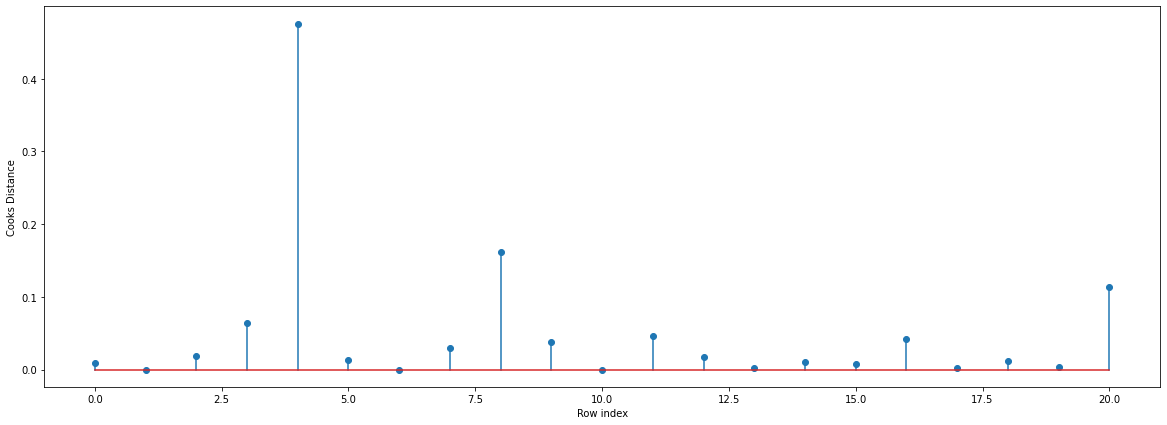

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
np.argmax(c), np.max(c)
df2 = df.drop([3],axis=0)
df3= df2.reset_index()
df4= df3.drop(['index'],axis=1)

In [48]:
model6= smf.ols('DT~ST', data=df4).fit()


In [49]:
print('P value is:', model6.pvalues, '\n', '\n', 'Rsquared value is:',model6.rsquared, 
      '\n', '\n','Adjusted Rsquared value is:', model6.rsquared )

P value is: Intercept    0.001034
ST           0.000013
dtype: float64 
 
 Rsquared value is: 0.6607903297050552 
 
 Adjusted Rsquared value is: 0.6607903297050552


In [ ]:
#The r square value sis decreasing further, we will not consider deleting any influence point now
#Best R square value = 0.6954434611324224 

In [50]:
model_final = model6

In [51]:
print(model_final.params,'\n','\n',model_final.pvalues,'\n','\n',round(model_final.rsquared,4),'\n','\n',
      round(model_final.rsquared_adj,4))

Intercept    6.834060
ST           1.586189
dtype: float64 
 
 Intercept    0.001034
ST           0.000013
dtype: float64 
 
 0.6608 
 
 0.6419


#Salary Hike

In [53]:
Sh_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Salary_Data.csv')
Sh_df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [54]:
Sh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [56]:
Sh_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [58]:
Sh_df.value_counts()

YearsExperience  Salary  
10.5             121872.0    1
10.3             122391.0    1
1.3              46205.0     1
1.5              37731.0     1
2.0              43525.0     1
2.2              39891.0     1
2.9              56642.0     1
3.0              60150.0     1
3.2              54445.0     1
                 64445.0     1
3.7              57189.0     1
3.9              63218.0     1
4.0              55794.0     1
                 56957.0     1
4.1              57081.0     1
4.5              61111.0     1
4.9              67938.0     1
5.1              66029.0     1
5.3              83088.0     1
5.9              81363.0     1
6.0              93940.0     1
6.8              91738.0     1
7.1              98273.0     1
7.9              101302.0    1
8.2              113812.0    1
8.7              109431.0    1
9.0              105582.0    1
9.5              116969.0    1
9.6              112635.0    1
1.1              39343.0     1
dtype: int64

In [59]:
Sh_df.isnull().value_counts()

YearsExperience  Salary
False            False     30
dtype: int64

In [ ]:
#No Null VLues
#Lets see if there are some outliers


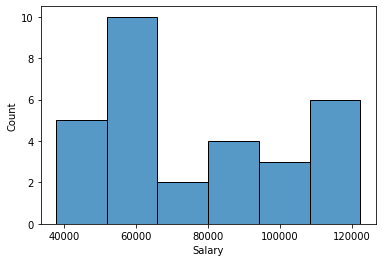

In [62]:
sns.histplot(Sh_df.Salary)

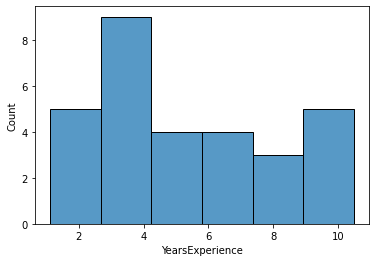

In [63]:
sns.histplot(Sh_df.YearsExperience)

In [ ]:
#It doesnt seems like it is having some outliers, everything seems normally distributed

#Lets Build the Model

In [64]:
model = smf.ols('Salary~YearsExperience', data=Sh_df).fit()

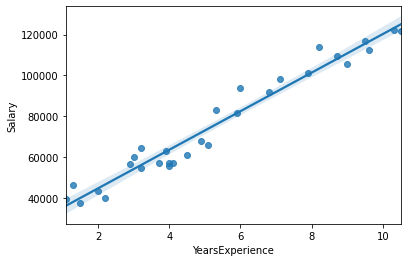

In [65]:
sns.regplot(x='YearsExperience', y='Salary', data=Sh_df)

In [66]:

print('pvalue:', model.pvalues, '\n','\n','Rsquared value is:', model.rsquared, '\n','\n', 
      'Adjusted Rsquared value is:', model.rsquared_adj)

pvalue: Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64 
 
 Rsquared value is: 0.9569566641435086 
 
 Adjusted Rsquared value is: 0.9554194021486339


In [ ]:
#R squared values is significantly high, we do not need any modification itterations or modeling influence points

In [ ]:
#LEts PRedict the Salary vlaues


In [69]:
predict = pd.DataFrame (model.predict(Sh_df), columns=['Predicted Salary'])
predict

,Predicted Salary
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [72]:
predict1 = pd.concat([Sh_df, predict], axis=1)

In [74]:
predict1

,YearsExperience,Salary,Predicted Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [75]:
#Lets RPedict new DP

In [77]:
new_data= pd.Series([5,7,11,15,20])

In [78]:
pred_new = pd.DataFrame(new_data, columns=['YearsExperience'])

In [79]:

model.predict(pred_new)

0     73042.011806
1     91941.936449
2    129741.785735
3    167541.635020
4    214791.446628
dtype: float64